In [6]:
#important libraries 
import pandas as pd
from sklearn.model_selection import train_test_split,KFold
import numpy as np
from sklearn.preprocessing import LabelEncoder #(specially use to for only y )
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif

In [ ]:
#check for multicolinearity,distribution etc

In [ ]:
#C:\Users\mayur\Desktop\datascience DELL\pythonstorage\dataset_ML

In [7]:
#read the data 
path ="C:/Users/mayur/Desktop/datascience DELL/pythonstorage/dataset_ML/heart.csv"
data=pd.read_csv(path)

In [8]:
data.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,1,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,Male,4,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,Male,4,120,229,0,2,129,1,2.6,2,2,reversible,No
3,37,Male,3,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,Female,2,130,204,0,2,172,0,1.4,1,0,normal,No


In [9]:
data.shape

(303, 14)

In [10]:
data.dtypes

age           int64
gender       object
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target       object
dtype: object

In [11]:
#get the count of y 
data.target.value_counts()

No     220
Yes     83
Name: target, dtype: int64

In [13]:
#1)to convert the Y-variable into
#using the labelEncoder
le = LabelEncoder()
data['Y'] =le.fit_transform(data.target)
data.head(5)

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Y
0,63,Male,1,145,233,1,2,150,0,2.3,3,0,fixed,No,0
1,67,Male,4,160,286,0,2,108,1,1.5,2,3,normal,Yes,1
2,67,Male,4,120,229,0,2,129,1,2.6,2,2,reversible,No,0
3,37,Male,3,130,250,0,0,187,0,3.5,3,0,normal,No,0
4,41,Female,2,130,204,0,2,172,0,1.4,1,0,normal,No,0


In [12]:
data.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
#drop the old Y-variables
data=data.drop('target',axis=1)

In [15]:
#rename Y to old Y-value
data=data.rename(columns={'Y':'target'})
data.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,Male,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,Male,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,Male,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,Female,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [16]:
data.dtypes

age           int64
gender       object
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int32
dtype: object

In [17]:
#split the columns into nc and fc
nc=data.select_dtypes(exclude='object').columns.values
fc=data.select_dtypes(include='object').columns.values

In [18]:
nc

array(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'target'], dtype=object)

In [19]:
fc

array(['gender', 'thal'], dtype=object)

In [21]:
#EDA
#NULL CHECK
data.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
#0 check 
data[nc][data[nc]==0].count()

age           0
cp            4
trestbps      0
chol          0
fbs         258
restecg     149
thalach       0
exang       204
oldpeak      97
slope         0
ca          176
target      220
dtype: int64

In [23]:
# analyse the factor cols
for f in fc:
    print('Factor column = ',f)
    print(data[f].unique())
    print('\n')

Factor column =  gender
['Male' 'Female']


Factor column =  thal
['fixed' 'normal' 'reversible' '1' '2']




In [24]:
#'thal' column has invalid  levels that have to be imputed
data.thal.value_counts()

normal        168
reversible    115
fixed          18
1               1
2               1
Name: thal, dtype: int64

In [25]:
#merge '1' and '2'  into the levels 'fixed'
data.thal[data.thal.isin(['1','2'])] = 'fixed'

C:\Users\mayur\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
#verify the changes
data.thal.value_counts()

normal        168
reversible    115
fixed          20
Name: thal, dtype: int64

Text(0.5, 1.0, 'Y-value distribution')

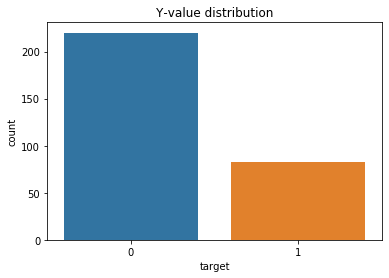

In [27]:
#count plot to check the y-distribution
sns.countplot(x='target',data=data)
plt.title('Y-value distribution')

In [28]:
#dummy varaibles --> is done to aviod baises ness
pd.get_dummies(data.gender).head(20)

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
5,0,1
6,1,0
7,1,0
8,0,1
9,0,1


In [29]:
data.gender.head()

0      Male
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [30]:
pd.get_dummies(data.gender,drop_first=True).head(10)

,Male
0,1
1,1
2,1
3,1
4,0
5,1
6,0
7,0
8,1
9,1


In [31]:
#convert factor to dummmies varraibles
new_data=data.copy()

In [32]:
fc

array(['gender', 'thal'], dtype=object)

In [33]:
for f in fc:
    dummy=pd.get_dummies(data[f],drop_first=True,prefix=f)
    new_data= new_data.join(dummy)
    

In [34]:
new_data.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender_Male,thal_normal,thal_reversible
0,63,Male,1,145,233,1,2,150,0,2.3,3,0,fixed,0,1,0,0
1,67,Male,4,160,286,0,2,108,1,1.5,2,3,normal,1,1,1,0
2,67,Male,4,120,229,0,2,129,1,2.6,2,2,reversible,0,1,0,1
3,37,Male,3,130,250,0,0,187,0,3.5,3,0,normal,0,1,1,0
4,41,Female,2,130,204,0,2,172,0,1.4,1,0,normal,0,0,1,0


In [35]:
new_cols = new_data.columns
new_cols

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'gender_Male',
       'thal_normal', 'thal_reversible'],
      dtype='object')

In [39]:
#remove the original factor variables
new_cols =list(set(new_cols) -set(fc))
print(new_cols)

['target', 'trestbps', 'oldpeak', 'exang', 'age', 'gender_Male', 'thalach', 'thal_normal', 'cp', 'ca', 'thal_reversible', 'slope', 'restecg', 'fbs', 'chol']


In [40]:
#refresh the new dataset with the new columns
new_data = new_data[new_cols]
new_data.head()

,target,trestbps,oldpeak,exang,age,gender_Male,thalach,thal_normal,cp,ca,thal_reversible,slope,restecg,fbs,chol
0,0,145,2.3,0,63,1,150,0,1,0,0,3,2,1,233
1,1,160,1.5,1,67,1,108,1,4,3,0,2,2,0,286
2,0,120,2.6,1,67,1,129,0,4,2,1,2,2,0,229
3,0,130,3.5,0,37,1,187,1,3,0,0,3,0,0,250
4,0,130,1.4,0,41,0,172,1,2,0,0,1,2,0,204


In [41]:
new_data.dtypes

target               int32
trestbps             int64
oldpeak            float64
exang                int64
age                  int64
gender_Male          uint8
thalach              int64
thal_normal          uint8
cp                   int64
ca                   int64
thal_reversible      uint8
slope                int64
restecg              int64
fbs                  int64
chol                 int64
dtype: object

In [49]:
#splirt the data into train and test
trainx,testx,trainy,testy = train_test_split(new_data.drop('target',axis=1),new_data['target'],test_size=0.25)

In [50]:
print("trainx={},trainy={},testx={},testy ={}".format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(227, 14),trainy=(227,),testx=(76, 14),testy =(76,)


In [51]:
#build the logistic regression model using Logit()
m1=sm.Logit(trainy,trainx).fit()

Optimization terminated successfully.
         Current function value: 0.283331
         Iterations 7


In [52]:
#summary
m1.summary()
#coef -->log odd
#as tvalue increases, p area decreases
#that is why we say area less than 0.05 is significant , 
#the value greater than 1.645 is significant

#conf  ---> interval is lieing between - to + which involves zero

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  227
Model:                          Logit   Df Residuals:                      213
Method:                           MLE   Df Model:                           13
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                  0.5414
Time:                        10:55:53   Log-Likelihood:                -64.316
converged:                       True   LL-Null:                       -140.24
Covariance Type:            nonrobust   LLR p-value:                 8.758e-26
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
trestbps           -0.0018      0.012     -0.153      0.878      -0.025       0.022
oldpeak             0.4119      0.253      1.626      0.104      -0.085       0.908
exang               0.4503      0.502      0.897      0.370      -0.534       1.434
age                -0.0233      0.028     -0.817      0.414      -0.079       0.033
gender_Male         0.3810      0.604      0.631      0.528      -0.803       1.565
thalach            -0.0382      0.010     -3.689      0.000      -0.058      -0.018
thal_normal        -0.9957      0.858     -1.160      0.246      -2.678       0.687
cp                  0.7556      0.275      2.751      0.006       0.217       1.294
ca                  1.1396      0.284      4.013      0.000       0.583       1.696
thal_reversible     0.5160      0.794      0.650      0.516      -1.040       2.072
slope               0.2991      0.470      0.637      0.524      -0.622       1.220
restecg             0.2126      0.240      0.887      0.375      -0.257       0.682
fbs                 0.7470      0.626      1.193      0.233      -0.481       1.975
chol                0.0039      0.005      0.857      0.392      -0.005       0.013
===================================================================================
"""

In [56]:
#beta values for individuals
m1.params

trestbps          -0.001827
oldpeak            0.411947
exang              0.450307
age               -0.023279
gender_Male        0.380970
thalach           -0.038168
thal_normal       -0.995679
cp                 0.755551
ca                 1.139620
thal_reversible    0.515987
slope              0.299074
restecg            0.212591
fbs                0.747023
chol               0.003889
dtype: float64

In [57]:
#k-Fold Cross-validation
folds= 5
cv_acc = []

X= trainx.values
Y= trainy.values

kf=KFold(folds)
#kf.get_n_splits(X)



In [58]:

for train_index,test_index in kf.split(X):
    cv_trainx,cv_trainy =X[train_index],Y[train_index]
    cv_testx, cv_testy = X[test_index], Y[test_index]
     
    #BUILD MODEL on cv_train and predict on cv_test    
    m=sm.Logit(cv_trainy,cv_trainx).fit() 
    
    p=m.predict(cv_testx)
    
    #convert predictions into classes
    p_Y = p.copy()
    
    #take the cutoff as 0.5
    p_Y[p_Y < 0.5] = 0
    p_Y[p_Y > 0.5] = 1
    
    #calculate the accuracy 
    cv_acc.append(np.round(accuracy_score(cv_testy,p_Y),3))
    


Optimization terminated successfully.
         Current function value: 0.269255
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274590
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283334
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280360
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.261909
         Iterations 8


In [60]:
#print the cross validation accuracies
print(cv_acc)

[0.804, 0.848, 0.844, 0.822, 0.844]


In [61]:
#test accuracy
np.round(np.mean(cv_acc),2)

0.83

In [62]:
#prediction on the test data
p1 = m1.predict(testx)
p1

66     0.658020
233    0.022516
207    0.054505
260    0.126965
216    0.706423
         ...   
92     0.362871
256    0.016729
123    0.937251
117    0.008297
27     0.027800
Length: 76, dtype: float64

In [63]:
#converting probabilities into classes 
p1_Y = p1.copy()
p1_Y[p1_Y < 0.5] = 0
p1_Y[p1_Y > 0.5] = 1

In [65]:
#confusion matrix
confusion_matrix(testy,p1_Y)


array([[55,  8],
       [ 3, 10]], dtype=int64)

In [67]:
df=pd.DataFrame({'actual':testy,'predicted':p1_Y})


In [69]:
pd.crosstab(df.actual,df.predicted,margins=True)

predicted,0.0,1.0,All
actual,,,
0,55,8,63
1,3,10,13
All,58,18,76


In [72]:
#classification_report
print(classification_report(testy,p1_Y))
#f1-score greater the score more is the weightage

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        63
           1       0.56      0.77      0.65        13

    accuracy                           0.86        76
   macro avg       0.75      0.82      0.78        76
weighted avg       0.88      0.86      0.86        76



In [73]:
##accuracy score
print(accuracy_score(testy,p1_Y))

0.8552631578947368


In [75]:
#AUC/ROC
from sklearn import metrics
fpr,tpr,threshold = metrics.roc_curve(testy,p1_Y)

In [76]:
#auc score
auc_score = metrics.auc(fpr,tpr)
print("AUC for model =",auc_score)

AUC for model = 0.8211233211233212


Text(0, 0.5, 'TPR')

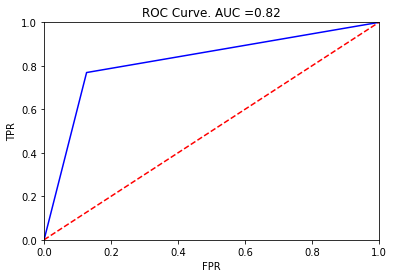

In [78]:
#plot for ROC 
plt.plot(fpr,tpr,'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve. AUC ='+str(round(auc_score,2)))
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
#how to make model better 
#
#try changing the cutoff
#check colinearity
#feature selection
#try to get more records of +ve class 
#try to change the train test ratio
#
#feature selction

In [79]:
#feature selection
features = trainx.columns
score,pval = f_classif(trainx,trainy)

In [ ]:
#store the features scores in a dataframe 
#cols= ['features','score','pvalue']

In [82]:
df_scores = pd.DataFrame({'feature':features,'score':score,'pvalue':pval})

In [83]:
#sort the dataset in the descending order of scores
df_scores.sort_values('score',ascending=False,inplace=True)
df_scores

,feature,score,pvalue
8,ca,81.467743,8.131654e-17
5,thalach,64.319026,5.768350e-14
1,oldpeak,58.964471,4.875472e-13
6,thal_normal,58.290407,6.397857e-13
7,cp,47.470332,5.537254e-11
9,thal_reversible,44.654748,1.825163e-10
2,exang,38.616090,2.472558e-09
10,slope,29.502176,1.445390e-07
3,age,12.290126,5.494843e-04
4,gender_Male,6.372127,1.228235e-02


In [ ]:
thalach,fbs	

In [84]:
data

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,Male,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,Male,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,Male,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,Female,2,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,Male,1,118,186,0,2,190,0,0.0,2,0,fixed,0
299,43,Female,4,132,341,1,2,136,1,3.0,2,0,reversible,1
300,65,Male,4,135,254,0,2,127,0,2.8,2,1,reversible,1
301,48,Male,4,130,256,1,2,150,1,0.0,1,2,reversible,1


In [88]:
cols = data.columns
cols.drop('target')
cols

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Text(0.5, 1, 'Correlation Matrix')

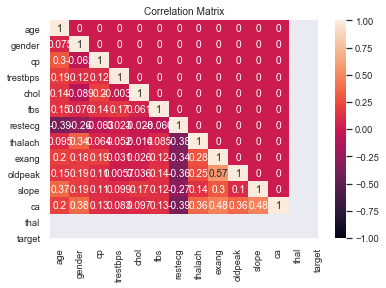

In [122]:
#heatmap
cor = data[cols].corr()
cor = np.tril(cor)
sns.set(font_scale = 0.85)
sns.heatmap(cor,xticklabels=cols,yticklabels=cols,vmin=-1,vmax=1,annot=True,square=False)
plt.title('Correlation Matrix')

In [ ]:
import numpy as np

a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
index = [2, 3, 6]

new_a = np.delete(a, index)

print(new_a) #Prints `[1, 2, 5, 6, 8, 9]`

In [131]:
nc

array(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'target'], dtype=object)

In [133]:
import numpy as np

nc

nc1 =['target']
nc1 = np.delete(nc,nc1)
nc1
#do this homework

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
#heatmap
cor = data[nc].corr()
cor = np.tril(cor)
sns.set(font_scale = 0.85)
sns.heatmap(cor,xticklabels=cols,yticklabels=cols,vmin=-1,vmax=1,annot=True,square=False)
plt.title('Correlation Matrix')

In [105]:
new_data.head()

,target,trestbps,oldpeak,exang,age,gender_Male,thalach,thal_normal,cp,ca,thal_reversible,slope,restecg,fbs,chol
0,0,145,2.3,0,63,1,150,0,1,0,0,3,2,1,233
1,1,160,1.5,1,67,1,108,1,4,3,0,2,2,0,286
2,0,120,2.6,1,67,1,129,0,4,2,1,2,2,0,229
3,0,130,3.5,0,37,1,187,1,3,0,0,3,0,0,250
4,0,130,1.4,0,41,0,172,1,2,0,0,1,2,0,204


In [106]:
new_data['ca']

0      0
1      3
2      2
3      0
4      0
      ..
298    0
299    0
300    1
301    2
302    3
Name: ca, Length: 303, dtype: int64

In [109]:
new1_data =new_data[['ca','thalach','oldpeak','thal_normal','cp','thal_reversible','exang','slope','age','target']]
new1_data

,ca,thalach,oldpeak,thal_normal,cp,thal_reversible,exang,slope,age,target
0,0,150,2.3,0,1,0,0,3,63,0
1,3,108,1.5,1,4,0,1,2,67,1
2,2,129,2.6,0,4,1,1,2,67,0
3,0,187,3.5,1,3,0,0,3,37,0
4,0,172,1.4,1,2,0,0,1,41,0
...,...,...,...,...,...,...,...,...,...,...
298,0,190,0.0,0,1,0,0,2,52,0
299,0,136,3.0,0,4,1,1,2,43,1
300,1,127,2.8,0,4,1,0,2,65,1
301,2,150,0.0,0,4,1,1,1,48,1


In [110]:
#splirt the data into train and test
trainx,testx,trainy,testy = train_test_split(new1_data.drop('target',axis=1),new1_data['target'],test_size=0.25)

In [111]:
print("trainx={},trainy={},testx={},testy ={}".format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(227, 9),trainy=(227,),testx=(76, 9),testy =(76,)


In [112]:
#build the logistic regression model using Logit()
m1=sm.Logit(trainy,trainx).fit()

Optimization terminated successfully.
         Current function value: 0.289660
         Iterations 7


In [113]:
#summary
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  227
Model:                          Logit   Df Residuals:                      218
Method:                           MLE   Df Model:                            8
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                  0.5060
Time:                        12:43:24   Log-Likelihood:                -65.753
converged:                       True   LL-Null:                       -133.10
Covariance Type:            nonrobust   LLR p-value:                 3.004e-25
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ca                  1.3458      0.288      4.673      0.000       0.781       1.910
thalach            -0.0151      0.007     -2.073      0.038      -0.029      -0.001
oldpeak             0.5425      0.221      2.455      0.014       0.109       0.976
thal_normal        -1.6905      0.846     -1.998      0.046      -3.349      -0.033
cp                  0.5027      0.249      2.021      0.043       0.015       0.990
thal_reversible     0.0025      0.803      0.003      0.998      -1.571       1.576
exang               0.6237      0.500      1.248      0.212      -0.356       1.603
slope               0.6852      0.435      1.574      0.115      -0.168       1.539
age                -0.0540      0.025     -2.205      0.027      -0.102      -0.006
===================================================================================
"""

In [114]:
#beta values for individuals
m1.params

ca                 1.345778
thalach           -0.015086
oldpeak            0.542509
thal_normal       -1.690544
cp                 0.502744
thal_reversible    0.002487
exang              0.623697
slope              0.685249
age               -0.054031
dtype: float64

In [115]:
#prediction on the test data
p1 = m1.predict(testx)
p1

176    0.073921
87     0.735639
50     0.258859
67     0.138165
26     0.005348
         ...   
247    0.348364
85     0.607195
64     0.004087
65     0.361180
164    0.078432
Length: 76, dtype: float64

In [116]:
#converting probabilities into classes 
p1_Y = p1.copy()
p1_Y[p1_Y < 0.5] = 0
p1_Y[p1_Y > 0.5] = 1

In [117]:
#confusion matrix
confusion_matrix(testy,p1_Y)


array([[50,  5],
       [ 5, 16]], dtype=int64)

In [118]:
df=pd.DataFrame({'actual':testy,'predicted':p1_Y})

In [119]:
pd.crosstab(df.actual,df.predicted,margins=True)

predicted,0.0,1.0,All
actual,,,
0,50,5,55
1,5,16,21
All,55,21,76


In [120]:
#classification_report
print(classification_report(testy,p1_Y))
#f1-score greater the score more is the weightage

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        55
           1       0.76      0.76      0.76        21

    accuracy                           0.87        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.87      0.87      0.87        76



In [121]:
##accuracy score
print(accuracy_score(testy,p1_Y))

0.868421052631579
